<a href="https://colab.research.google.com/github/payares0510/metodos-computacionales-1/blob/main/Tarea_Algebra_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

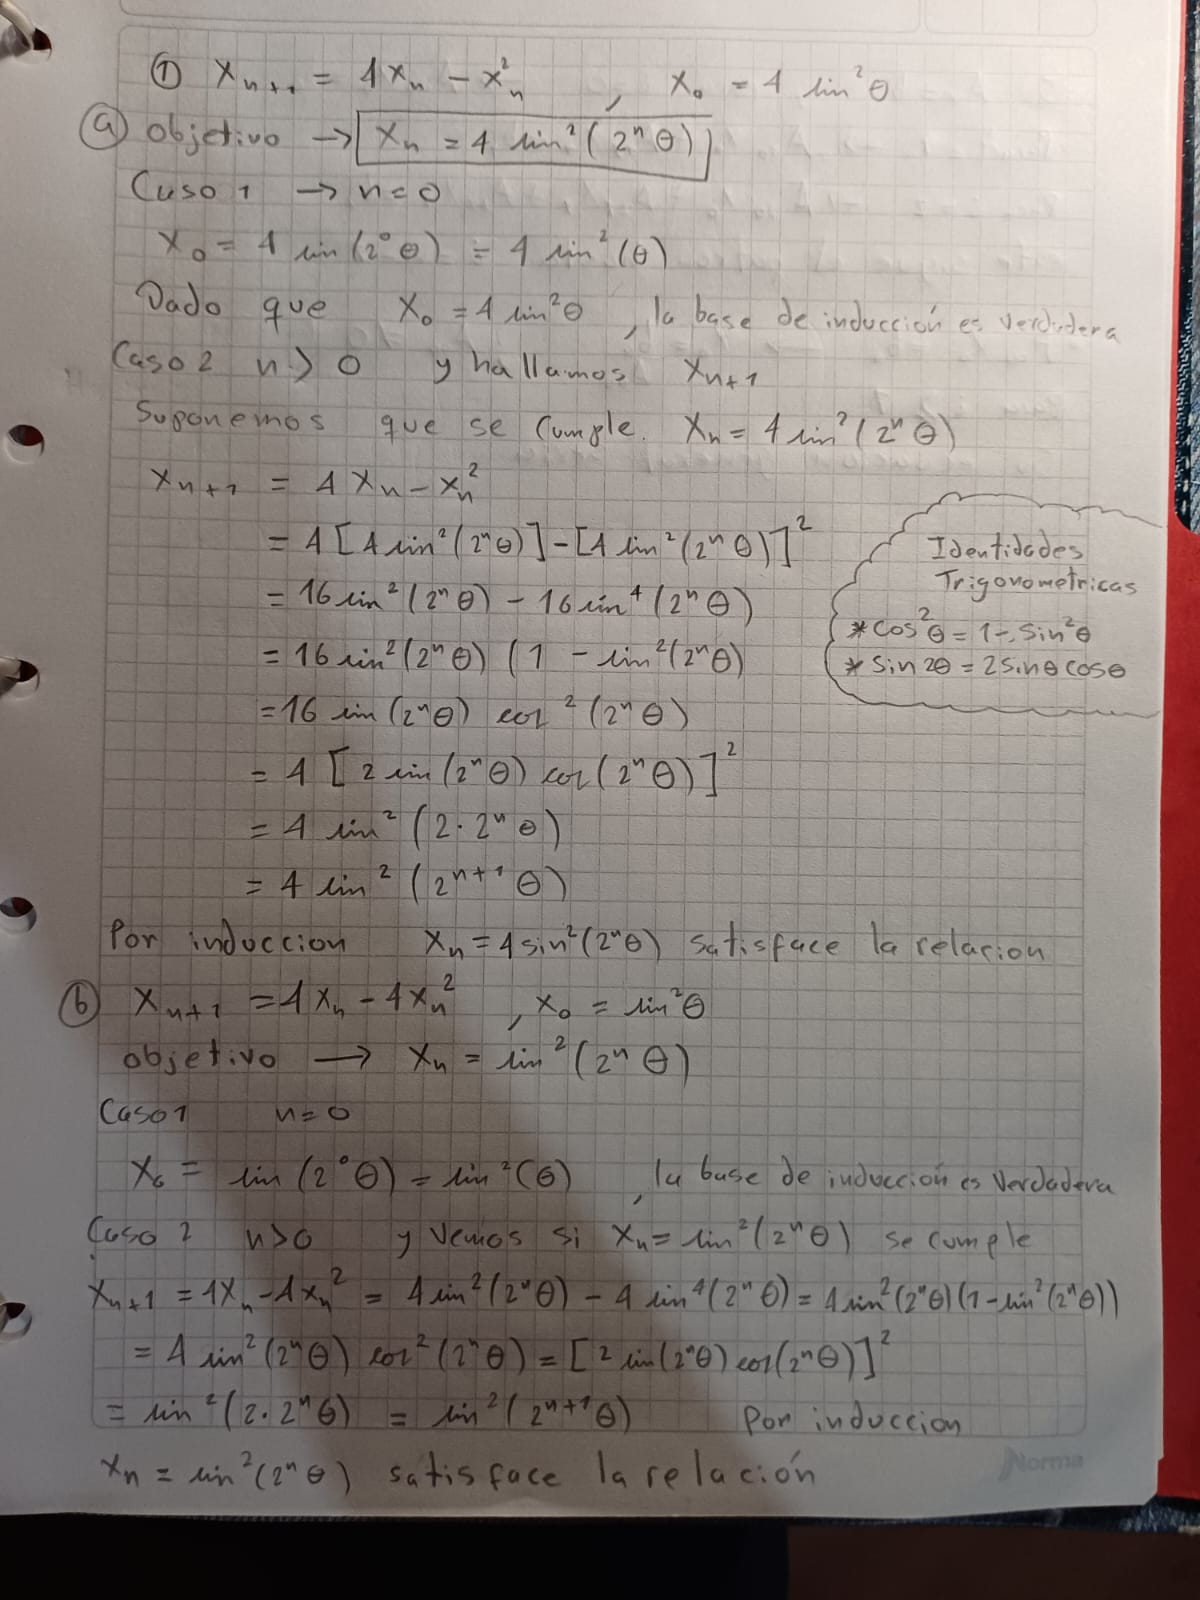

In [ ]:
#punto 2#
import numpy as np

A = np.array([[3, -1, -1],
              [-1, 3, 1],
              [2, 1, 4]], dtype=float)
b = np.array([1, 3, 7], dtype=float)
x = np.zeros_like(b)
tolerancia = 1e-10
max_iterations = 100

for k in range(max_iterations):
    x_old = x.copy()

    for i in range(len(b)):
        sum1 = sum(A[i, j] * x[j] for j in range(i))
        sum2 = sum(A[i, j] * x_old[j] for j in range(i + 1, len(b)))
        x[i] = (b[i] - sum1 - sum2) / A[i, i]
    if np.linalg.norm(x - x_old, ord=np.inf) < tolerancia:
        break

x, k


(array([1., 1., 1.]), 17)

In [ ]:
# punto 3#
import numpy as np

class SistemaLineal:
    def __init__(self, A, b):
        self.A = np.array(A, dtype=float)
        self.b = np.array(b, dtype=float)
        self.n = len(b)

    def jacobi(self, tol=1e-10, max_iter=100):
        x = np.zeros(self.n)
        D = np.diag(np.diag(self.A))
        L_U = self.A - D
        D_inv = np.linalg.inv(D)

        for i in range(max_iter):
            x_new = np.dot(D_inv, self.b - np.dot(L_U, x))
            if np.linalg.norm(x_new - x, ord=np.inf) < tol:
                print(f"Jacobi converge en {i+1} iteraciones")
                return x_new
            x = x_new

        print("Jacobi no converge")
        return x

    def gauss_seidel(self, tol=1e-10, max_iter=100):
        x = np.zeros(self.n)

        for i in range(max_iter):
            x_new = np.copy(x)
            for j in range(self.n):
                sum1 = np.dot(self.A[j, :j], x_new[:j])
                sum2 = np.dot(self.A[j, j+1:], x[j+1:])
                x_new[j] = (self.b[j] - sum1 - sum2) / self.A[j, j]

            if np.linalg.norm(x_new - x, ord=np.inf) < tol:
                print(f"Gauss-Seidel converge en {i+1} iteraciones")
                return x_new
            x = x_new

        print("Gauss-Seidel no converge")
        return x

A = [[3, -1, -1], [-1, 3, 1], [2, 1, 4]]
b = [1, 3, 7]

sistema = SistemaLineal(A, b)
sol_jacobi = sistema.jacobi()
sol_gauss_seidel = sistema.gauss_seidel()

print("Solución usando Jacobi:", sol_jacobi)
print("Solución usando Gauss-Seidel:", sol_gauss_seidel)

Jacobi converge en 23 iteraciones
Gauss-Seidel converge en 18 iteraciones
Solución usando Jacobi: [1. 1. 1.]
Solución usando Gauss-Seidel: [1. 1. 1.]


In [ ]:
#punto 4#

A = np.array([[1, 0, 0], [5, 1, 0], [-2, 3, 1]])
B = np.array([[4, -2, 1], [0, 3, 7], [0, 0, 2]])

def multiplicar_matrices(A, B):
    filas_A, columnas_A = A.shape
    filas_B, columnas_B = B.shape


    C = np.zeros((filas_A, columnas_B))

    for i in range(filas_A):
        for j in range(columnas_B):
            for k in range(columnas_A):
                C[i][j] += A[i][k] * B[k][j]

    return C

resultado = multiplicar_matrices(A, B)
print("El resultado de la multiplicación AB es:")
print(resultado)

El resultado de la multiplicación AB es:
[[ 4. -2.  1.]
 [20. -7. 12.]
 [-8. 13. 21.]]


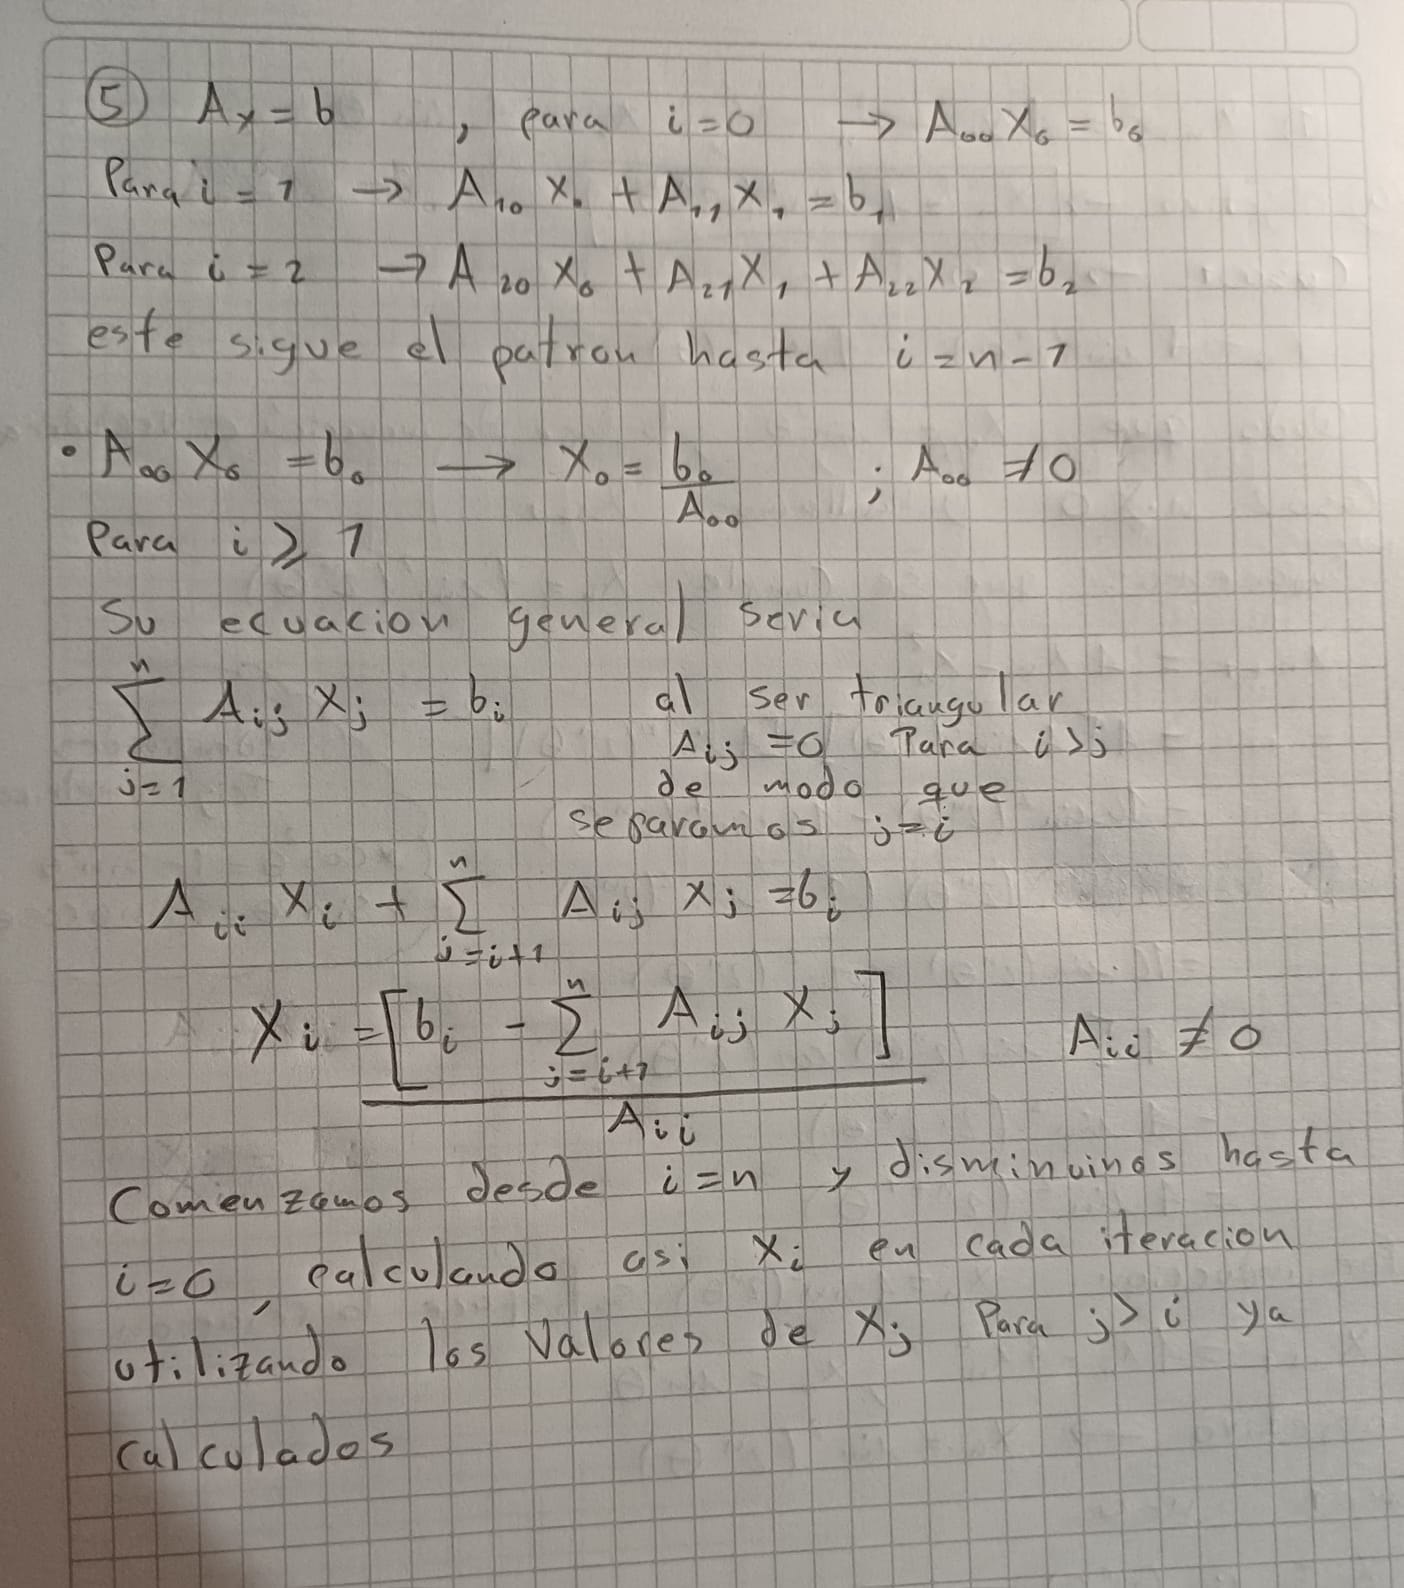

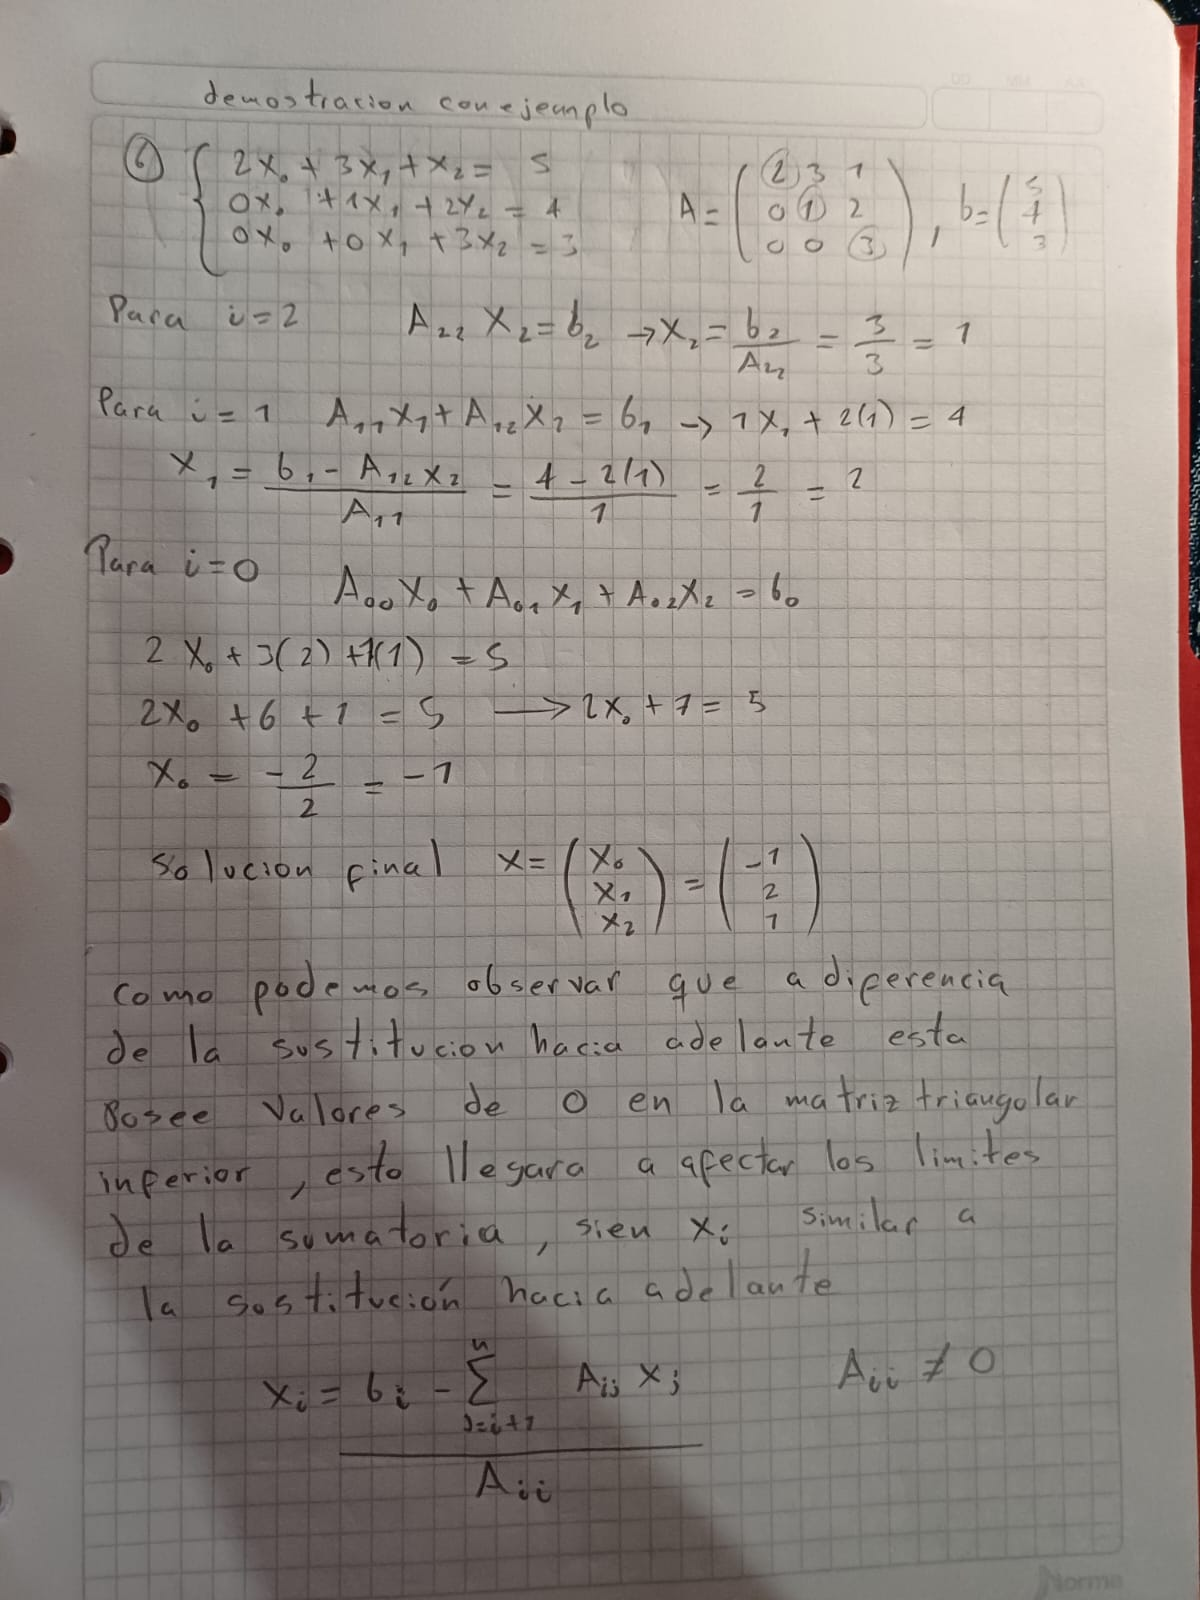

In [ ]:
#punto 8#
def descomposicion_lu(A):
    n = len(A)
    L = np.zeros((n, n))
    U = np.zeros((n, n))

    for i in range(n):
        L[i][i] = 1
        for j in range(i, n):
            U[i][j] = A[i][j] - sum(L[i][k] * U[k][j] for k in range(i))
        for j in range(i + 1, n):
            L[j][i] = (A[j][i] - sum(L[j][k] * U[k][i] for k in range(i))) / U[i][i]

    return L, U

A = np.array([[4, -2, 1], [20, -7, 12], [-8, 13, 17]], dtype=float)

L, U = descomposicion_lu(A)

print("Matriz L:")
print(L)
print("\nMatriz U:")
print(U)

Matriz L:
[[ 1.  0.  0.]
 [ 5.  1.  0.]
 [-2.  3.  1.]]

Matriz U:
[[ 4. -2.  1.]
 [ 0.  3.  7.]
 [ 0.  0. -2.]]


In [ ]:
#punto 10#

import numpy as np

def max_off_diagonal(A):
    n = A.shape[0]
    max_val = 0
    p = 0
    q = 1
    for i in range(n):
        for j in range(i + 1, n):
            if abs(A[i, j]) > max_val:
                max_val = abs(A[i, j])
                p, q = i, j
    return max_val, p, q

def jacobi_method(A, tol=1e-10, max_iterations=100):
    n = A.shape[0]
    D = A.copy()
    V = np.eye(n)
    iteration = 0

    while iteration < max_iterations:
        max_val, p, q = max_off_diagonal(D)
        if max_val < tol:
            break

        if D[p, p] == D[q, q]:
            theta = np.pi / 4
        else:
            theta = 0.5 * np.arctan(2 * D[p, q] / (D[p, p] - D[q, q]))

        R = np.eye(n)
        R[p, p] = np.cos(theta)
        R[q, q] = np.cos(theta)
        R[p, q] = -np.sin(theta)
        R[q, p] = np.sin(theta)

        D = R.T @ D @ R
        V = V @ R

        iteration += 1

    eigenvalues = np.diag(D)
    eigenvectors = V
    return eigenvalues, eigenvectors

A = np.array([[4, 1, 1],
              [1, 3, 2],
              [1, 2, 5]])

eigenvalues_jacobi, eigenvectors_jacobi = jacobi_method(A)

print("Valores propios (Jacobi):")
print(eigenvalues_jacobi)
print("\nVectores propios (Jacobi):")
print(eigenvectors_jacobi)

eigenvalues_np, eigenvectors_np = np.linalg.eig(A)

print("\nValores propios (Numpy):")
print(eigenvalues_np)
print("\nVectores propios (Numpy):")
print(eigenvectors_np)


In [ ]:
#punto 12#

import numpy as np

def f1(x):
    x1, x2 = x
    return np.log(x1**2 + x2**2) - np.sin(x1 * x2) - (np.log(2) + np.log(np.pi))

def f2(x):
    x1, x2 = x
    return np.exp(x1 - x2) + np.cos(x1 * x2)

def F(x):
    return np.array([f1(x), f2(x)])

def jacobian(x):
    x1, x2 = x
    df1_dx1 = (2*x1 / (x1**2 + x2**2)) - x2 * np.cos(x1 * x2)
    df1_dx2 = (2*x2 / (x1**2 + x2**2)) - x1 * np.cos(x1 * x2)
    df2_dx1 = np.exp(x1 - x2) - x2 * np.sin(x1 * x2)
    df2_dx2 = -np.exp(x1 - x2) - x1 * np.sin(x1 * x2)
    return np.array([[df1_dx1, df1_dx2], [df2_dx1, df2_dx2]])

def newton_raphson(x0, tol=1e-6, max_iter=100):
    x = np.array(x0)
    for i in range(max_iter):
        J = jacobian(x)
        F_val = F(x)
        delta_x = np.linalg.solve(J, -F_val)
        x = x + delta_x
        if np.linalg.norm(F_val) < tol:
            print(f'Converge en {i+1} iteraciones')
            return x
    print('Se alcanzó el número máximo de iteraciones sin convergencia')
    return x
x0 = [2, 2]
sol = newton_raphson(x0)
print("Solucion:", sol)

def objective_function(x):
    return 0.5 * np.sum(F(x)**2)

def gradient(x):
    return np.dot(jacobian(x).T, F(x))

def gradient_descent(x0, learning_rate=0.01, tol=1e-6, max_iter=1000):
    x = np.array(x0)
    for i in range(max_iter):
        grad = gradient(x)
        x = x - learning_rate * grad
        if np.linalg.norm(grad) < tol:
            print(f'Converge en {i+1} iteraciones')
            return x
    print('Se alcanzó el número máximo de iteraciones sin convergencia.')
    return x

sol_grad = gradient_descent(x0)
print("Solución con descenso de gradiente", sol_grad)


In [ ]:
#punto 13#

import numpy as np

def jacobian_cuarto_orden(f, x, h=0.01):
    n = len(x)
    jacobian = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            x_h2_pos = np.copy(x)
            x_h1_pos = np.copy(x)
            x_h1_neg = np.copy(x)
            x_h2_neg = np.copy(x)
            x_h2_pos[j] += 2 * h
            x_h1_pos[j] += h
            x_h1_neg[j] -= h
            x_h2_neg[j] -= 2 * h
            jacobian[i, j] = (-f(x_h2_pos)[i] + 8*f(x_h1_pos)[i] - 8*f(x_h1_neg)[i] + f(x_h2_neg)[i]) / (12 * h)

    return jacobian

def f1_568(x):
    x1, x2, x3 = x
    return 6 * x1 - 2 * np.cos(x2 * x3) - 1

def f2_568(x):
    x1, x2, x3 = x
    return 9 * x2 + np.sqrt(x1**2 + 1) + np.sin(x3) + 1.06 + 0.9

def f3_568(x):
    x1, x2, x3 = x
    return 60 * x3 + 3 * np.exp(-x1 * x2) + 10 * np.pi - 3

def F_568(x):
    return np.array([f1_568(x), f2_568(x), f3_568(x)])

x = [0.5, 0.5, 0.5]
h = 0.01
jac_cuarto = jacobian_cuarto_orden(F_568, x, h)
print("Jacobiano con derivada de cuarto orden:")
print(jac_cuarto)

def jacobian_segundo_orden(f, x, h=0.01):
    n = len(x)
    jacobian = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            x_h1_pos = np.copy(x)
            x_h1_neg = np.copy(x)
            x_h1_pos[j] += h
            x_h1_neg[j] -= h
            jacobian[i, j] = (f(x_h1_pos)[i] - f(x_h1_neg)[i]) / (2 * h)

    return jacobian

jac_segundo = jacobian_segundo_orden(F_568, x, h)
print("Jacobiano con derivada de segundo orden:")
print(jac_segundo)
for h_val in [0.01, 0.001, 0.0001, 0.00001]:
    jac_cuarto = jacobian_cuarto_orden(F_568, x, h_val)
    jac_segundo = jacobian_segundo_orden(F_568, x, h_val)
    difference = np.linalg.norm(jac_cuarto - jac_segundo)
    print(f'Difference between Jacobians for h = {h_val}: {difference}')


In [8]:
#punto 14#

import sympy as sp
Jx = sp.Matrix([[0, 0, 0],
                [0, 0, -1],
                [0, 1, 0]])

Jy = sp.Matrix([[0, 0, 1],
                [0, 0, 0],
                [-1, 0, 0]])

Jz = sp.Matrix([[0, -1, 0],
                [1, 0, 0],
                [0, 0, 0]])

def commutator(A, B):
    return A * B - B * A

commutator_xy = commutator(Jx, Jy)
commutator_yz = commutator(Jy, Jz)
commutator_zx = commutator(Jz, Jx)
epsilon_123 = sp.Matrix([[0, 0, 1],
                         [0, 0, 1],
                         [-1, 0, 0]])

epsilon_312 = sp.Matrix([[1, 0, 0],
                         [0, 1, 0],
                         [0, 0, 1]])

